#MALIGNANT COMMENTS CLASSIFICATION

#Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 
Data Set Description
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:

-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 

-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 

-	Rude: It denotes comments that are very rude and offensive.

-	Threat: It contains indication of the comments that are giving any threat to someone. 	

-	Abuse: It is for comments that are abusive in nature. 

-	Loathe: It describes the comments which are hateful and loathing in nature.  

-	ID: It includes unique Ids associated with each comment text given.   

-	Comment text: This column contains the comments extracted from various social media platforms. 

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. 


In [2]:
import pandas as pd
import numpy as np
!pip install langdetect
import langdetect

     |████████████████████████████████| 981 kB 11.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=04742a5f322e3d4b564a63b3ed0032e997929c38db3733d2bd095b10db026159
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
!pip install langdetect
import langdetect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,StratifiedKFold
!pip install scikit-plot
!pip install mlrose
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [5]:
data=pd.read_csv('/content/drive/MyDrive/datatraine/train.csv')

In [6]:
data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [7]:
data.drop('id',axis=1,inplace=True)

I am dropping this columns because it si not useful in this case

# Cleaning Text

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [9]:
wnl=WordNetLemmatizer()
corpus=[]

In [10]:
for i in range(len(data)):
  review=re.sub('[^a-zA-Z]',' ',data['comment_text'][i])
  review=review.lower()
  review=review.split()
  review=[wnl.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

**Here i am removing all the extra text that is not useful for my model**

In [11]:
data['clean_comment_text']=corpus

# Feature Engineering

In [12]:
data['Language']=data['clean_comment_text'].apply(lambda x: langdetect.detect(x) if x.strip() !="" else "")
data

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment_text,Language
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...,en
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww match background colour seemingly stuck th...,en
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...,en
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestion improvement wondered sect...,en
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page,en
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,second time asking view completely contradicts...,en
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,ashamed horrible thing put talk page,en
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,spitzer umm there actual article prostitution ...,en
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,look like actually put speedy first version de...,en


Now we have a clean text

**Here i am adding more columns that will tell me which comment has which language like ENGLISH,HINDI E.T.C**

In [13]:
data['word_count']=data['clean_comment_text'].apply(lambda x:len(str(x).split(" ")))
data['char_count']=data['clean_comment_text'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
data['sentence_count']=data['clean_comment_text'].apply(lambda x: len(str(x).split(".")))
data['average_word_length']=data['char_count']/data['word_count']
data['avg_sentence_length']=data['word_count']/data['sentence_count']

*Here i am doing more feature engineering which will tell me the average word lenth and avg sentence length will will help me to understand what average len of comment people do*

In [14]:
def find_pol(review):
  return TextBlob(review).sentiment.polarity

inding the positive or negative sentiment with the help of TEXTBLOB

In [15]:
data['Sentiment']=data['clean_comment_text'].apply(find_pol)

In [16]:
def labels(review):
  if review>0:
    return 'positive'

  elif review<0:
    return 'negative'
  elif review==0:
    return 'neutral'

Converting the sentiment values using this functions into positive, negative and neutral

In [17]:
data['Sentiment_Label']=data['Sentiment'].apply(labels)
data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment_text,Language,word_count,char_count,sentence_count,average_word_length,avg_sentence_length,Sentiment,Sentiment_Label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...,en,23,134,1,5.826087,23.0,0.136364,positive
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww match background colour seemingly stuck th...,en,10,58,1,5.800000,10.0,0.250000,positive
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...,en,21,121,1,5.761905,21.0,0.150000,positive
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestion improvement wondered sect...,en,52,313,1,6.019231,52.0,0.257143,positive
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page,en,5,25,1,5.000000,5.0,0.000000,neutral


In [18]:
df=data[['malignant','highly_malignant','rude','threat','abuse','loathe']]

In [19]:
counts=df.sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

# EDA

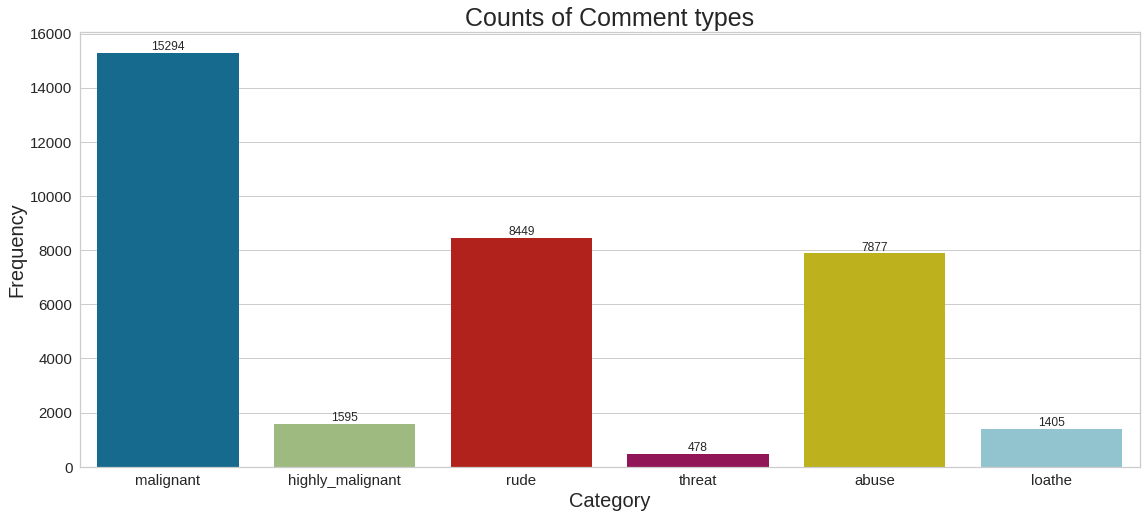

In [20]:
plt.figure(figsize=(19,8))
ax=sns.barplot(counts.index,counts.values)
plt.title("Counts of Comment types",fontsize=25)
plt.ylabel("Frequency",fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel("Category",fontsize=20)
plt.xticks(fontsize=15)
rects=ax.patches
labels=counts.values
for rect,label in zip(rects,labels):
  height=rect.get_height()
  ax.text(rect.get_x()+ rect.get_width()/2,height+5,label,ha='center',va='bottom')
plt.show()

Malignant,Rude and Abuse are highly comments that peoples do and there are less values of highly_malignant and threat and loathe as compare to upper three

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]), <a list of 9 Text major ticklabel objects>)

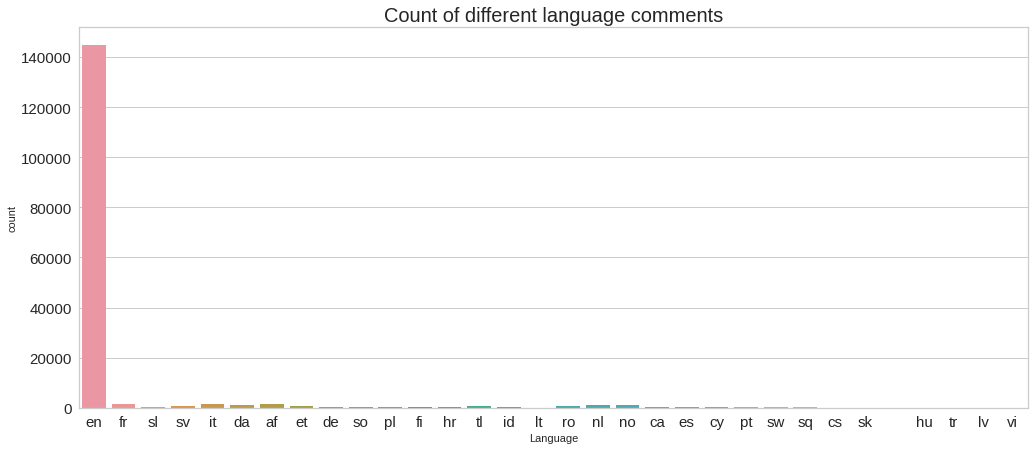

In [21]:
plt.figure(figsize=(17,7))
sns.countplot(data['Language'])
plt.title("Count of different language comments",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

as i can see there are many comments that are only in english and others are in different language so i can filter them out beacuse these have very less count my model will face tille difficulty to understand other languages with this much of less count or i can even do text augmentation but these rows are already have a high count so my system will not able to train the model

In [22]:
data['Sentiment_Label'].value_counts()

positive    83013
neutral     40841
negative    35717
Name: Sentiment_Label, dtype: int64

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text major ticklabel objects>)

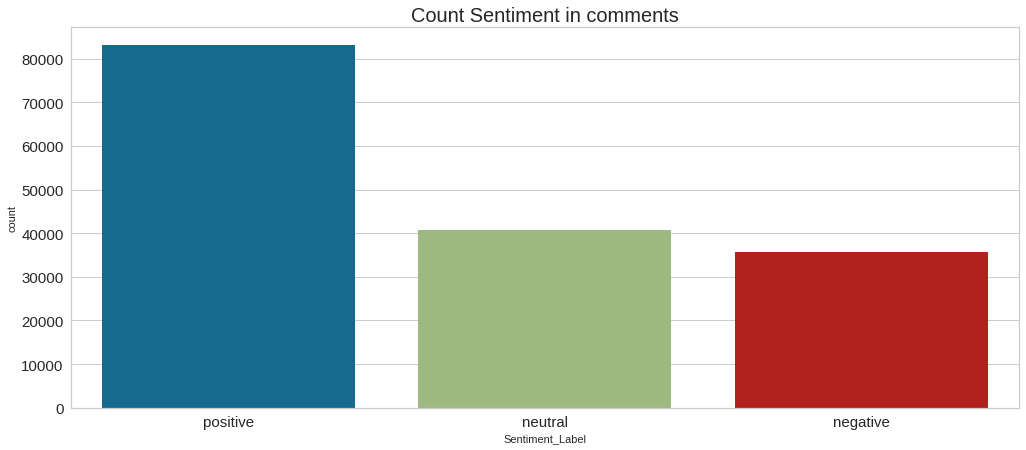

In [23]:
plt.figure(figsize=(17,7))
sns.countplot(data['Sentiment_Label'])
plt.title("Count Sentiment in comments",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

As we can see there are many comments that are positive and neagtive also have acount of 35717 so i can say mostly people are happy and some are facing some problem that why neutral sentiment is there and many people are not really happy that our neagtive sentiment shows

Text(0.5, 1.0, 'Average Sentence Length')

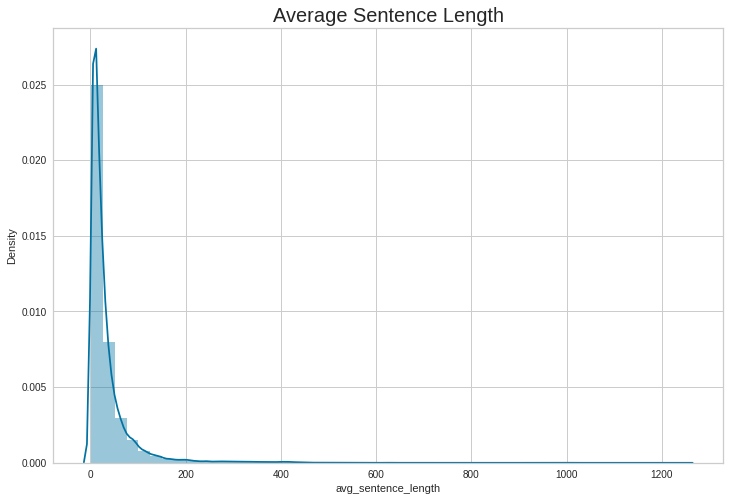

In [24]:
plt.figure(figsize=(12,8))
sns.distplot(data['avg_sentence_length'])
plt.title("Average Sentence Length",fontsize=20)


The average legth of comment lies between 0-50 and there are also many peoples who use to do long comments like 1200 long also

Text(0.5, 1.0, 'Average Word Length')

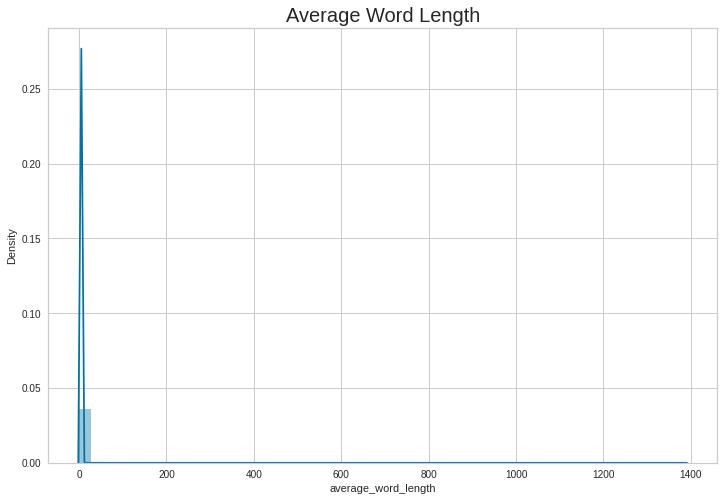

In [25]:
plt.figure(figsize=(12,8))
sns.distplot(data['average_word_length'])
plt.title("Average Word Length",fontsize=20)

The average word length of most of the comments is between 0-20

with the above graph i can see which comment type is having more count 

# words from malignant comment

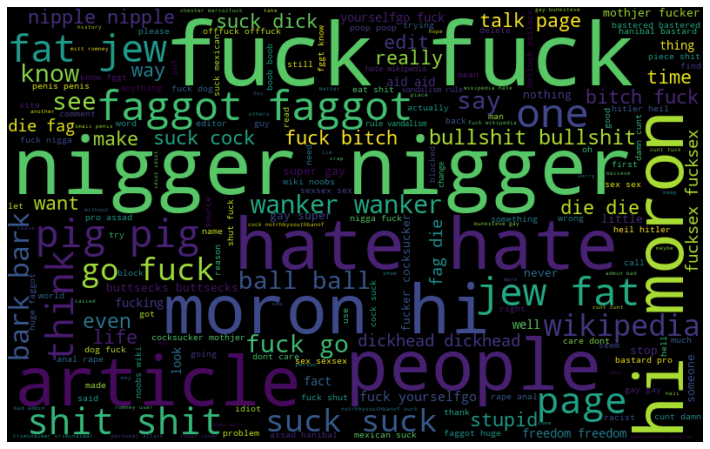

In [26]:
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in data['clean_comment_text'][data['malignant']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Some words from  highly Malignant comment

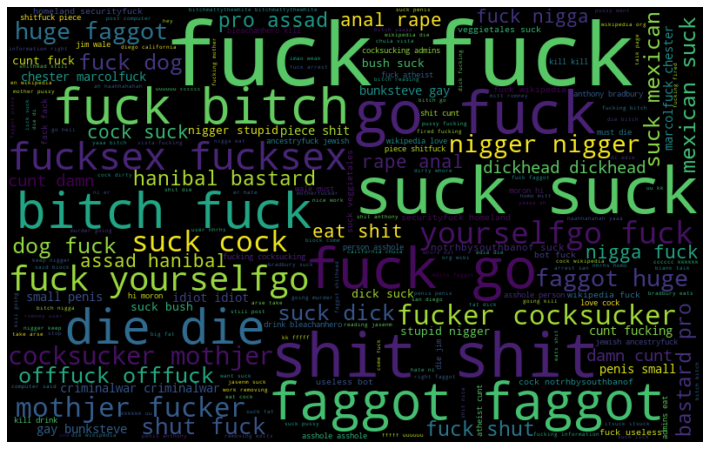

In [27]:
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in data['clean_comment_text'][data['highly_malignant']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Words from threat comment


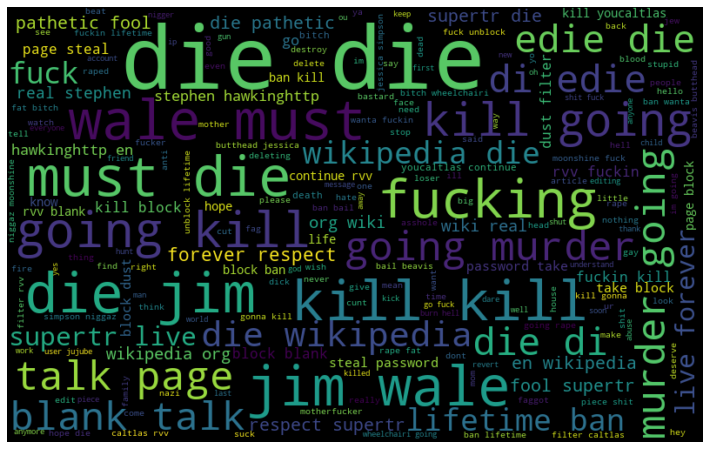

In [28]:
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in data['clean_comment_text'][data['threat']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word from rude comment

---



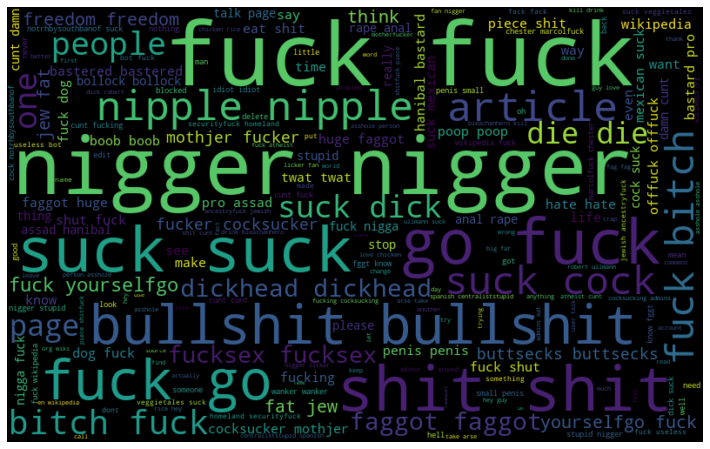

In [29]:
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in data['clean_comment_text'][data['rude']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word from abuse comment

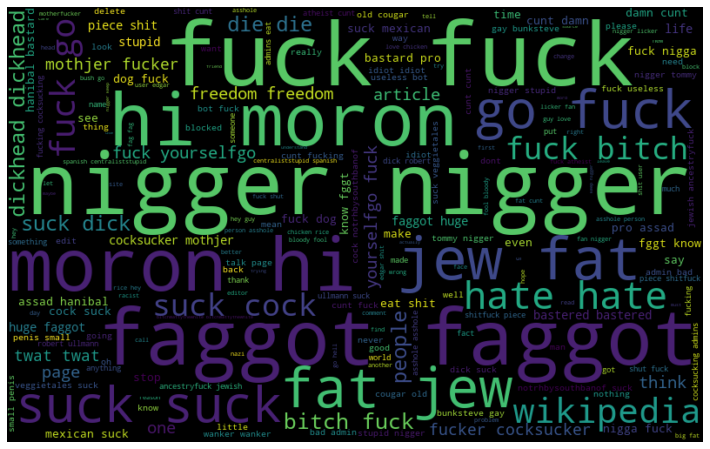

In [30]:
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in data['clean_comment_text'][data['abuse']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Words from loathe comment

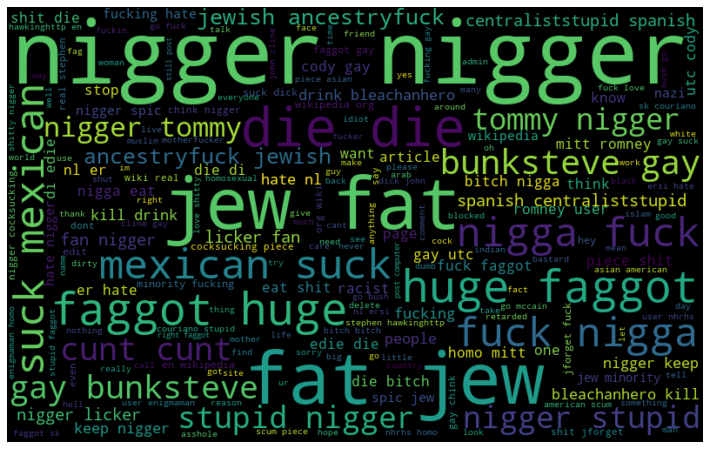

In [31]:
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in data['clean_comment_text'][data['loathe']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#These are the some words from all comments we can see these are really neagtive comments

In [32]:
data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment_text,Language,word_count,char_count,sentence_count,average_word_length,avg_sentence_length,Sentiment,Sentiment_Label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...,en,23,134,1,5.826087,23.0,0.136364,positive
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww match background colour seemingly stuck th...,en,10,58,1,5.800000,10.0,0.250000,positive
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...,en,21,121,1,5.761905,21.0,0.150000,positive
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestion improvement wondered sect...,en,52,313,1,6.019231,52.0,0.257143,positive
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page,en,5,25,1,5.000000,5.0,0.000000,neutral


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()
data['Language']=le.fit_transform(data['Language'])
data['Sentiment_Label']=le.fit_transform(data['Sentiment_Label'])

#Heatmap

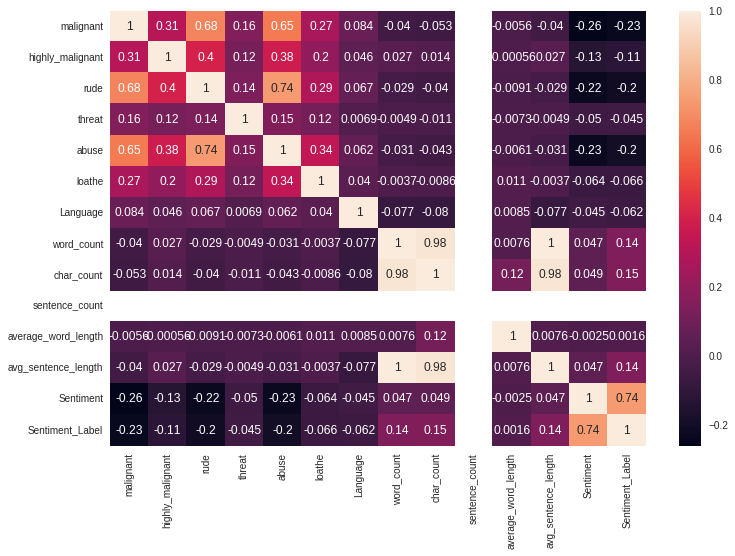

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

#The features that i have created have good correlation and some features are highly correlatedd as well